<a href="https://colab.research.google.com/github/AyaSMostafa/Classification-on-Autism-Dataset/blob/master/model6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import pandas as pd
import numpy as np
frame= pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data_all.csv')

In [5]:
len(frame)
frame.drop_duplicates(keep='first',inplace=True)
frame.shape # (73002, 41)
#-----------
#drop
drop_list = ['uuid']
frame = frame.drop(drop_list,axis=1)

In [6]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
print(frame.isnull().sum())
# mark zero values as missing or NaN
frame = frame.replace(0, nan)
frame.fillna(frame.mean(), inplace=True)
# retrieve the numpy array
values = frame.values
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())
##--------------------------------------------------
#4
X = frame.iloc[:, :-1].values
y = frame.iloc [:, -1].values
#change y values to 0 or 1
#y = np.where( y> 14, 1, 0) # Classify target above 14 or less
y = y.astype('int64')
X = X.astype('float64')
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                test_size=0.30)
##--------------------------------------------------
#5
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
print(y_train)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train))

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

label_encoder.fit(y)
#-------------------------------
#6

from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()

# To scale data
scaler.fit(frame)



q1     2
q2     2
q3     2
q4     2
q5     2
q6     2
q7     2
q8     2
q9     2
q10    2
q11    2
q12    2
q13    2
q14    2
q15    2
q16    2
q17    2
q18    2
q19    2
q20    2
q21    2
q22    2
q23    2
q24    2
q25    2
q26    2
q27    2
q28    2
q29    2
q30    2
q31    2
q32    2
q33    2
q34    2
q35    2
q36    2
q37    2
q38    2
q39    2
res    2
dtype: int64
Missing: 0
[12 12 11 ... 14 13 13]
multiclass
multiclass
multiclass


StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
#--------------------------------------7 Support vector classifier svm --------------------------------------------
from sklearn.svm import SVC # 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
svmModel = SVC(kernel='linear',random_state=1)
# Fit data
svmModel.fit(X_train, y_train)
print('SVM accuracy ', svmModel.score(X_test, y_test))
# Predict the test set
ypred_svmModel = svmModel.predict(X_test)
print (ypred_svmModel)
# Generate confusion matrix
cm_svmModel = confusion_matrix(y_test, ypred_svmModel )

In [47]:
#--------------------------------------8  Naive classifier nb --------------------------------------------
#Import Libraries
from sklearn.naive_bayes import GaussianNB
#----------------------------------------------------

#Applying GaussianNB Model 
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)

print('NB accuracy', nbModel.score(X_test, y_test))
#Calculating Prediction
ypred_nbModel = nbModel.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
cm_nbModel = confusion_matrix(y_test, ypred_nbModel)
#print(cm_nbModel)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)


NB accuracy 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR accuracy 0.096890552942788
[[   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    7    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   15    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   64    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  192    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  459    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  866    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1394    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 2122    

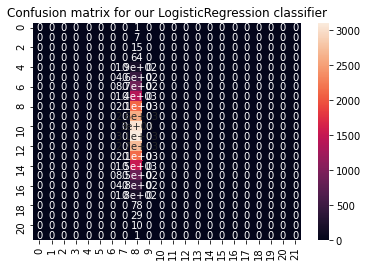

In [22]:
#--------------------------------------9  LogisticRegression lr --------------------------------------------
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
lrModel = LogisticRegression()
lrModel.fit(X_train, y_train)
# Use score method to get accuracy of model
score_lrModel = lrModel.score(X_test, y_test)
print('LR accuracy',score_lrModel)
#cm matrix
ypred_lrModel = lrModel.predict(X_test)
ytrue_lrModel = y_test
from sklearn.metrics import confusion_matrix
cm_lrModel = confusion_matrix(ytrue_lrModel, ypred_lrModel)
print(cm_lrModel)#
plt.title('Confusion matrix for our LogisticRegression classifier')
import seaborn as sns
sns.heatmap(cm_lrModel, annot=True)
#---------------------------------------------------------------------------------------------

In [23]:
#-------------------------------------- 10 K- Nearest Neighbour (KNN) --------------------------------------------
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=3)

knnModel.fit(X_train,y_train)

print('KNN accuracy',knnModel.score(X_test, y_test))
ypred_knnModel = knnModel.predict(X_test)
ytrue_knnModel = y_test
#evaluate our knn model.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm_knnModel = confusion_matrix(ytrue_knnModel, ypred_knnModel)
print(cm_knnModel)

# outcome values order in sklearn
#tp, fn, fp, tn = confusion_matrix(ytrue_knnModel,ypred_knnModel,labels=[1,0]).reshape(-1)
#print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrixKNN = classification_report(ytrue_knnModel,ypred_knnModel,labels=[1,0])
print('Classification report : \n',matrixKNN )


KNN accuracy 0.008766722980685813
[[   0    0    0    0    1    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    7    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0   15    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0   64    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0  192    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0  459    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0  866    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0 1394    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0 2122    0    0    0    0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

In [24]:
#-------------------------------------- 11 Decision Tree dt --------------------------------------------

#Applying DecisionTreeRegressor Model 

from sklearn.tree import DecisionTreeClassifier
dtModel = DecisionTreeClassifier( max_depth=3,random_state=33)
dtModel.fit(X_train, y_train)

#Calculating Details
print('DecisionTreeRegressor accuracy is : ' , dtModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
ypred_dtModel = dtModel.predict(X_test)
cm_dtModel = confusion_matrix(y_test, ypred_dtModel)

#---------------------------------------------------------------------------------

DecisionTreeRegressor accuracy is :  0.096890552942788
----------------------------------------------------


In [25]:
#------------------------------------- 12 Random Forest rf --------------------------------------------
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)
print('Random Forest accuracy is : ' , rfModel.score(X_test, y_test))
ypred_rfModel = rfModel.predict(X_test)

print((ypred_rfModel))
cm_rfModel = confusion_matrix(y_test, ypred_rfModel)
print(cm_rfModel)


Random Forest accuracy is :  0.096890552942788
[13 13 13 ... 13 13 13]
[[   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    7    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   15    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0   64    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  192    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  459    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  866    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1394    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0   

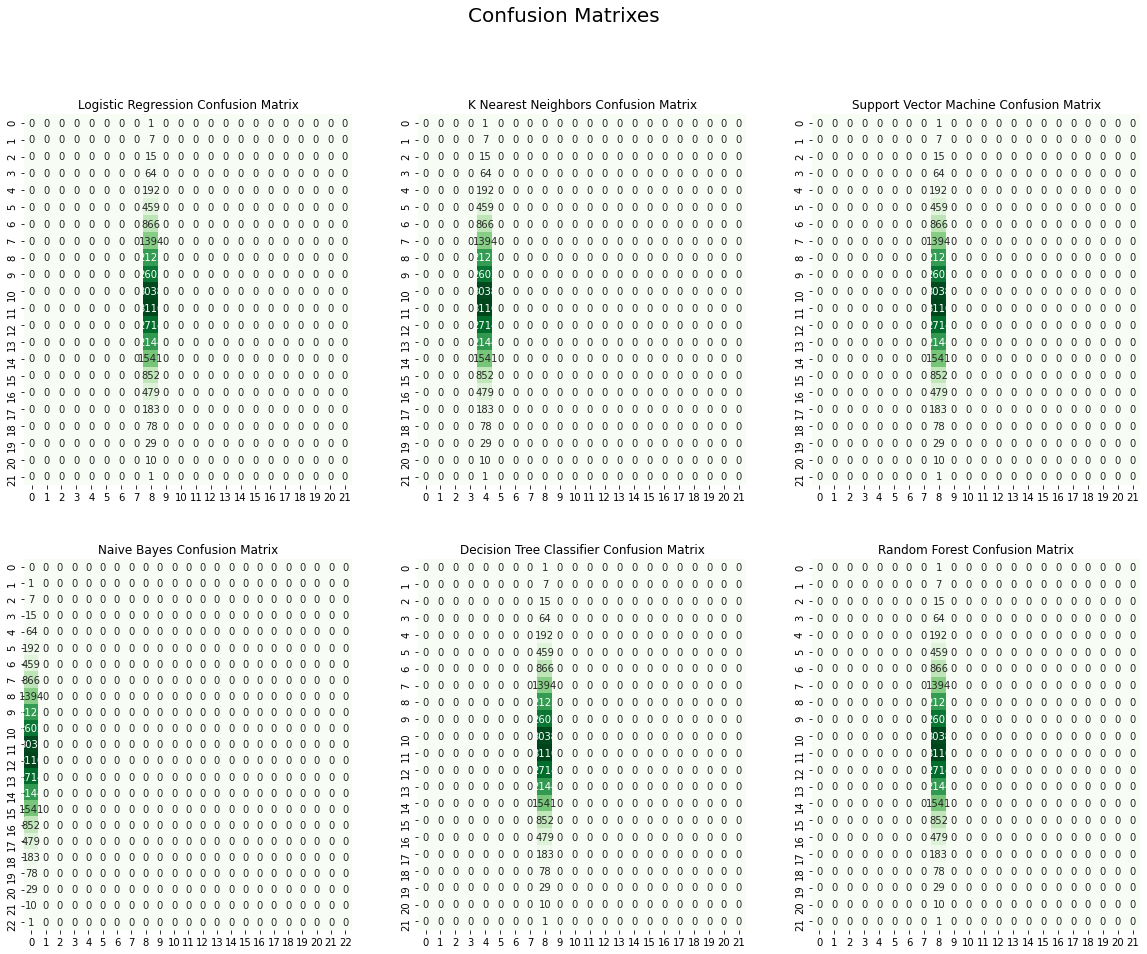

In [26]:
#----------------------------------- Visualization Confision Matrix------------------------
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes",fontsize=20)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lrModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knnModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svmModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nbModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rfModel,cbar=False,annot=True,cmap="Greens",fmt="d")

plt.show()

In [2]:
#----------------------------------- Pickle approach----------------------------------------------------
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "Autism.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(svmModel, file)
    pickle.dump(nbModel, file)
    pickle.dump(lrModel, file)
    pickle.dump(knnModel, file)
    pickle.dump(dtModel, file)
    pickle.dump(rfModel, file)
    
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:
    Pickled_svmModel = pickle.load(file)
    Pickled_nbModel  = pickle.load(file)
    Pickled_lrModel  = pickle.load(file)
    Pickled_knnModel = pickle.load(file)
    Pickled_dtModel  = pickle.load(file)
    Pickled_rfModel  = pickle.load(file)
 
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score_svm = Pickled_svmModel.score(X_test, y_test) 
#score_nb = Pickled_nbModel(X_test, y_test) 
score_lr = Pickled_lrModel.score(X_test, y_test) 
score_knn = Pickled_knnModel.score(X_test, y_test) 
score_dt = Pickled_dtModel.score(X_test, y_test) 
score_rf = Pickled_rfModel.score(X_test, y_test) 

# Print the Score
print("Test score from svm : {0:.2f} %".format(100 * score_svm))  
#print("Test score from Naive Bayes : {0:.2f} %".format(100 * score_nb)) 
print("Test score from Logistic Regression : {0:.2f} %".format(100 * score_lr )) 
print("Test score from knn : {0:.2f} %".format(100 * score_knn))  
print("Test score from Random Forest : {0:.2f} %".format(100 * score_rf))  
print("Test score from Desicion tree : {0:.2f} %".format(100 * score_dt)) 

# Predict the Labels using the reloaded Model
ypredict_svm = Pickled_svmModel.predict(X_test)  

ypredict_svm

NameError: ignored

NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
def write_output(predictions):

    submissionFile = [["ID", "Predicted"]]
    for i, prediction in enumerate(predictions):
        submissionFile.append([i + 1, int(prediction)])

    # Write to file
    with open('Submission.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(submissionFile)
gradientBoost= svmModel.fit(X_train, y_train)

XtestNew = transform_test_samples(testData, selected_features)
predictions = predict(gradientBoost, XtestNew)
write_output(predictions)